In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn styles
%matplotlib inline
sns.set_palette('colorblind')
sns.set_style('white')
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
# Read in files from our previous .ipynb: "TweetGetter"
trump_tweets = pd.read_csv('realdonaldtrump_tweets.csv')
clinton_tweets = pd.read_csv('hillaryclinton_tweets.csv')

# Assign labels to each DataFrame
trump_tweets["author"] = "Trump"
clinton_tweets["author"] = "Clinton"

# Concatenate the two into one DataFrame, and clean the data
tweets = pd.concat([trump_tweets, clinton_tweets])
tweets = tweets[[ u'id', u'text', u'created_at', u'favorite_count', u'retweet_count', u'author']]
tweets["id"] = tweets["id"].astype("str")
tweets = tweets.reset_index()
tweets = tweets.drop("index",1)
tweets.head()

,id,text,created_at,favorite_count,retweet_count,author
0,783436108176629760,Thank you ARIZONA! This is a MOVEMENT like nob...,Tue Oct 04 22:38:18 +0000 2016,4229.0,1729.0,Trump
1,783393314309484544,My childcare plan makes a difference for worki...,Tue Oct 04 19:48:15 +0000 2016,11110.0,4719.0,Trump
2,783391423663964160,I will be watching the great Governor @Mike_Pe...,Tue Oct 04 19:40:44 +0000 2016,14211.0,4809.0,Trump
3,783390310969651200,"Join me in Reno, Nevada tomorrow at 3:30pm! #A...",Tue Oct 04 19:36:19 +0000 2016,5743.0,2053.0,Trump
4,783149570721144832,"Join me in Reno, Nevada on Wednesday at 3:30pm...",Tue Oct 04 03:39:42 +0000 2016,13895.0,6189.0,Trump


In [3]:
# Functions for our lambda functions later
def percentInCaps(s):
    inCaps = sum(1 for c in s if c.isupper())
    inLowerCase = sum(1 for c in s if c.islower())
    return inCaps/float(inCaps + inLowerCase) 

def num_hashtags(s):
    return sum(1 for c in s if c == "#")

def num_mentions(s):
    return sum(1 for c in s if c == "@")

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~' # Excludes '#' and '@'
def percentPunctuation(s):
    return sum(1 for c in s if c in punctuation)/float(len(s))
    
# Create new features based on text attributes
tweets["percentPunctuation"] = tweets["text"].apply(lambda x: percentPunctuation(x)) 
tweets["percentInCaps"] = tweets["text"].apply(lambda x: percentInCaps(x))    
tweets["numHastags"] = tweets["text"].apply(lambda x: num_hashtags(x))
tweets["numMentions"] = tweets["text"].apply(lambda x: num_mentions(x))

# Get a summary of Clinton vs. Trump Tweet attributes
tweets.groupby("author").mean()

,favorite_count,retweet_count,percentPunctuation,percentInCaps,numHastags,numMentions
author,,,,,,
Clinton,5991.002167,3144.962229,0.063471,0.093032,0.129102,0.491022
Trump,16600.378303,5974.324837,0.059060,0.139253,0.478707,0.661486


In [4]:
# Extract month, day, and hour from timestamp and append back to DataFrame

weekdayDict = {"0": "M", "1": "Tu", "2": "W", "3": "Th", "4": "F", "5": "Sa", "6": "Su"}

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets["hour"] = tweets["created_at"].apply(lambda x: x.hour)
tweets["day"] = tweets["created_at"].apply(lambda x: x.weekday())
tweets["dayofmonth"] = tweets["created_at"].apply(lambda x: x.day)
tweets["month"] = tweets["created_at"].apply(lambda x: x.month)

tweets.head()

,id,text,created_at,favorite_count,retweet_count,author,percentPunctuation,percentInCaps,numHastags,numMentions,hour,day,dayofmonth,month
0,783436108176629760,Thank you ARIZONA! This is a MOVEMENT like nob...,2016-10-04 22:38:18,4229.0,1729.0,Trump,0.056338,0.330275,0,0,22,1,4,10
1,783393314309484544,My childcare plan makes a difference for worki...,2016-10-04 19:48:15,11110.0,4719.0,Trump,0.060606,0.068627,1,0,19,1,4,10
2,783391423663964160,I will be watching the great Governor @Mike_Pe...,2016-10-04 19:40:44,14211.0,4809.0,Trump,0.033333,0.075269,0,1,19,1,4,10
3,783390310969651200,"Join me in Reno, Nevada tomorrow at 3:30pm! #A...",2016-10-04 19:36:19,5743.0,2053.0,Trump,0.093750,0.217391,2,0,19,1,4,10
4,783149570721144832,"Join me in Reno, Nevada on Wednesday at 3:30pm...",2016-10-04 03:39:42,13895.0,6189.0,Trump,0.079365,0.217391,1,0,3,1,4,10


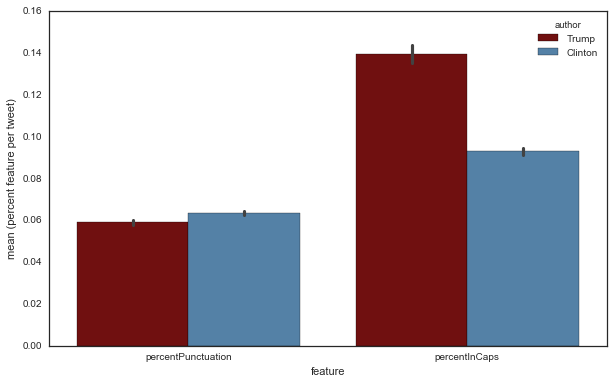

In [87]:
# Draw bar plots comparing Hillary and Donald by % in CAPS and % of punctuation

value_matrix = pd.DataFrame(columns=["author", "feature", "value"])
for i in tweets[["author", "percentPunctuation", "percentInCaps"]].iterrows():
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "percentPunctuation", i[1]["percentPunctuation"]]
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "percentInCaps", i[1]["percentInCaps"]]

sns.barplot(data=value_matrix, hue="author", x="feature", y="value", palette=["maroon", "steelblue"]).set(ylabel='mean (percent feature per tweet)');

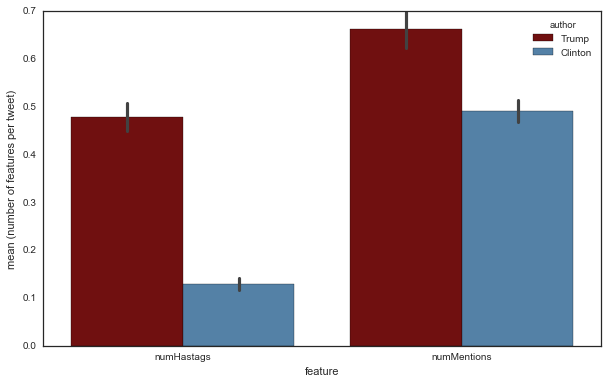

In [88]:
# Draw bar plots comparing Hillary and Donald by number of #s and @s per tweet

value_matrix = pd.DataFrame(columns=["author", "feature", "value"])
for i in tweets[["author", "numHastags", "numMentions"]].iterrows():
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "numHastags", i[1]["numHastags"]]
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["author"], "numMentions", i[1]["numMentions"]]

sns.barplot(data=value_matrix, hue="author", x="feature", y="value", palette=["maroon", "steelblue"]).set(ylabel='mean (number of features per tweet)');

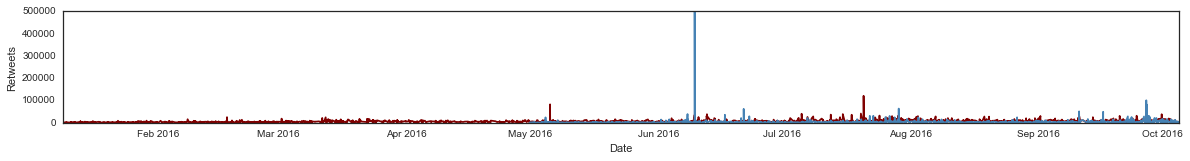

In [66]:
# Create timeseries graph for Trump vs. Hillary retweets counts

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "retweet_count", "author"]]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)
trump = value_matrix[value_matrix["author"] == "Trump"]
clinton = value_matrix[value_matrix["author"] == "Clinton"]

plt.rcParams['figure.figsize'] = (20.0, 2.0)
plt.plot(trump["created_at"], trump["retweet_count"], "maroon", clinton["created_at"], clinton["retweet_count"], "steelblue");
plt.ylabel("Retweets");
plt.xlabel("Date");

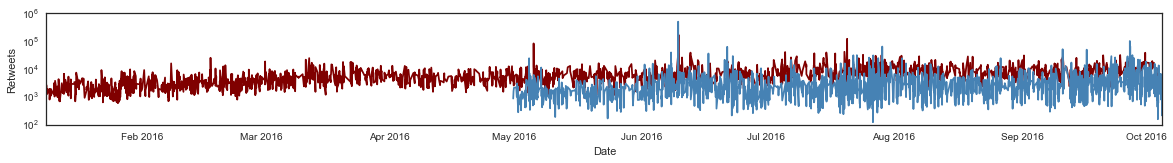

In [68]:
# Use log scale

plt.yscale('log')
plt.plot(trump["created_at"], trump["retweet_count"], "maroon", clinton["created_at"], clinton["retweet_count"], "steelblue")
plt.ylabel("Retweets");
plt.xlabel("Date");

/Users/jaymahabal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


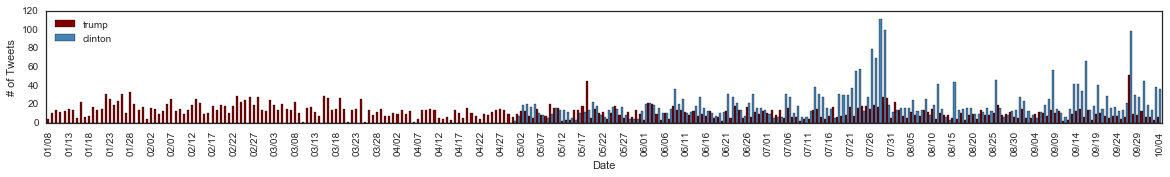

In [52]:
# For frequency of Tweets

def twochar(row):
    month = str(row["month"])
    day = str(row["dayofmonth"])
    while len(month) < 2:
        month = "0" + month
    while len(day) < 2:
        day = "0" + day
    return month+"/"+day

def isTrump(row):
    if row["author"] == 'Trump':
        return 1
    else:
        return 0

def isClinton(row):
    if row["author"] == 'Clinton':
        return 1
    else:
        return 0    
    
value_matrix = tweets[["month", "dayofmonth", "author"]]
value_matrix['monthday'] = value_matrix.apply(twochar, axis=1)
value_matrix = value_matrix.sort_values('monthday').reset_index().drop('index', 1)
value_matrix["trump"] = value_matrix.apply(isTrump, 1)
value_matrix["clinton"] = value_matrix.apply(isClinton, 1)

barchart = value_matrix.groupby("monthday").sum()[["trump", "clinton"]].plot(kind='bar', width=1.0, color=['maroon', 'steelblue'])
barchart.set_xlabel("Date")
barchart.set_ylabel("# of Tweets")
for label in barchart.xaxis.get_ticklabels():
    label.set_visible(False)
for label in barchart.xaxis.get_ticklabels()[0::5]:
    label.set_visible(True)

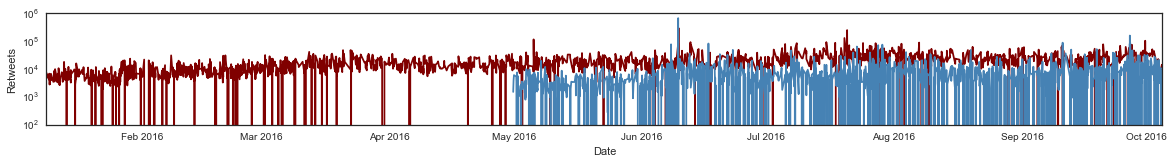

In [69]:
# Create timeseries graph for Trump vs. Hillary favorite counts

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "favorite_count", "author"]]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)
trump = value_matrix[value_matrix["author"] == "Trump"]
clinton = value_matrix[value_matrix["author"] == "Clinton"]

plt.yscale('log')
plt.plot(trump["created_at"], trump["favorite_count"], "maroon", clinton["created_at"], clinton["favorite_count"], "steelblue")
plt.ylabel("Retweets");
plt.xlabel("Date");

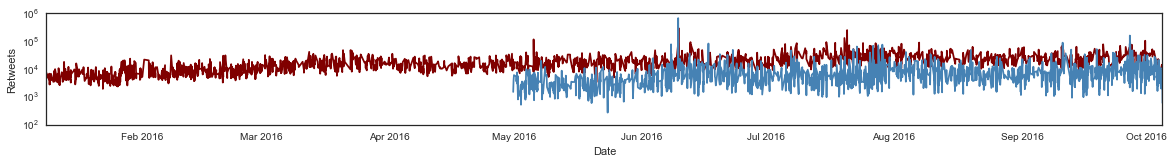

In [70]:
# Exclude tweets that have 0 likes, presumably because they're retweets

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "favorite_count", "author"]]
value_matrix = value_matrix[value_matrix["favorite_count"] != 0]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)
trump = value_matrix[value_matrix["author"] == "Trump"]
clinton = value_matrix[value_matrix["author"] == "Clinton"]

plt.yscale('log')
plt.plot(trump["created_at"], trump["favorite_count"], "maroon", clinton["created_at"], clinton["favorite_count"], "steelblue")
plt.ylabel("Retweets");
plt.xlabel("Date");

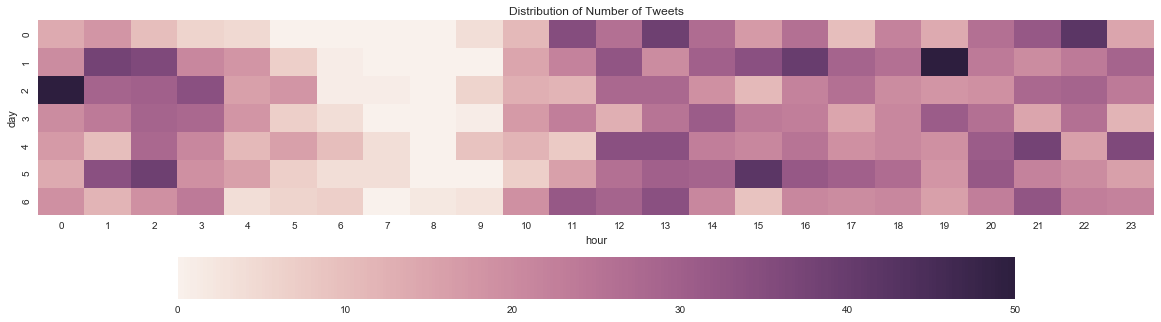

In [81]:
# Heatmap of Trump Tweets

value_matrix = tweets[tweets["author"] == "Trump"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"});
plt.title("Distribution of Number of Tweets");

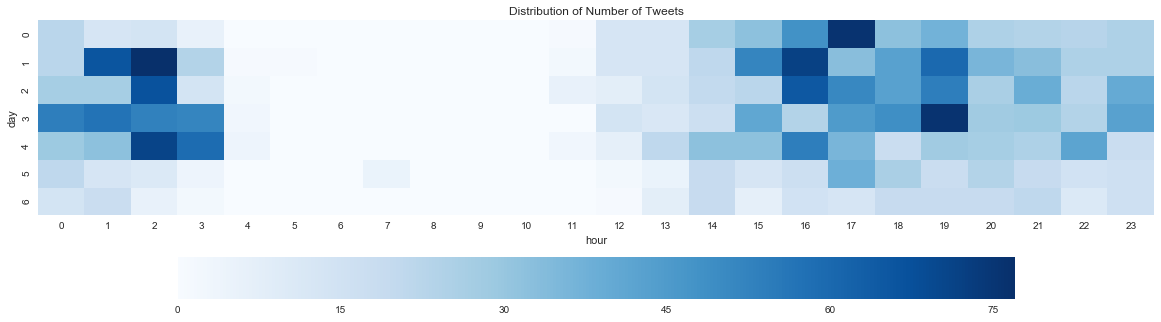

In [79]:
# Heatmap of Clinton Tweets

value_matrix = tweets[tweets["author"] == "Clinton"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns):
    value_matrix[i] = 0

value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap="Blues");
plt.title("Distribution of Number of Tweets");

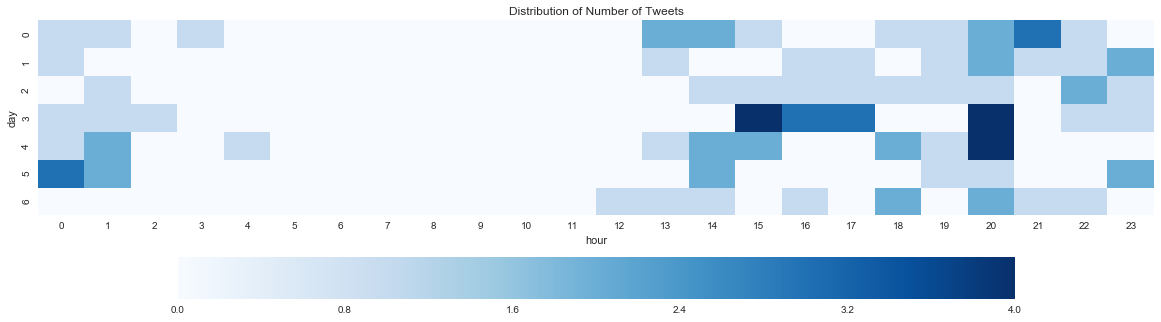

In [80]:
# Only tweets from the Hills herself

clinton = tweets[tweets["author"] == "Clinton"]
hillary = clinton[clinton["text"].str.contains("-H")]

value_matrix = hillary[hillary["author"] == "Clinton"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns):
    value_matrix[i] = 0

value_matrix = value_matrix.sort_index(axis=1)    
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap="Blues");
plt.title("Distribution of Number of Tweets");